In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('dataset/penguins_size.csv')
data.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [4]:
data['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [5]:
data.isnull().sum().sort_index().head()

body_mass_g          2
culmen_depth_mm      2
culmen_length_mm     2
flipper_length_mm    2
island               0
dtype: int64

In [6]:
data.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [7]:
data=data.dropna()
data = data[data.sex!='.']
data.isnull().sum().sort_index().head(2)

body_mass_g        0
culmen_depth_mm    0
dtype: int64

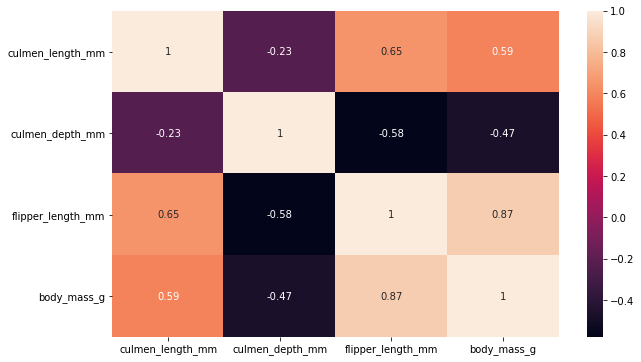

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True);

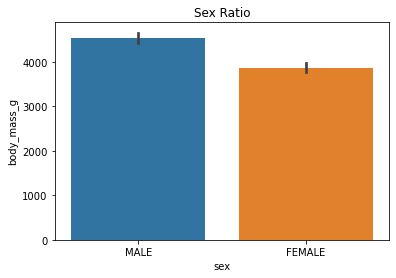

In [9]:
sns.barplot(x=data['sex'],y=data['body_mass_g']).set(title="Sex Ratio");

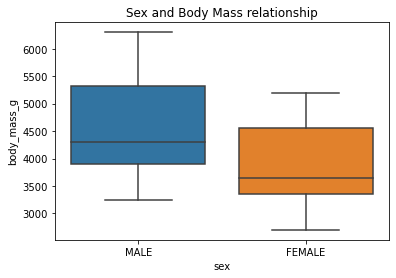

In [10]:
sns.boxplot(x=data.sex, y=data['body_mass_g'],orient='v').set(title='Sex and Body Mass relationship');   

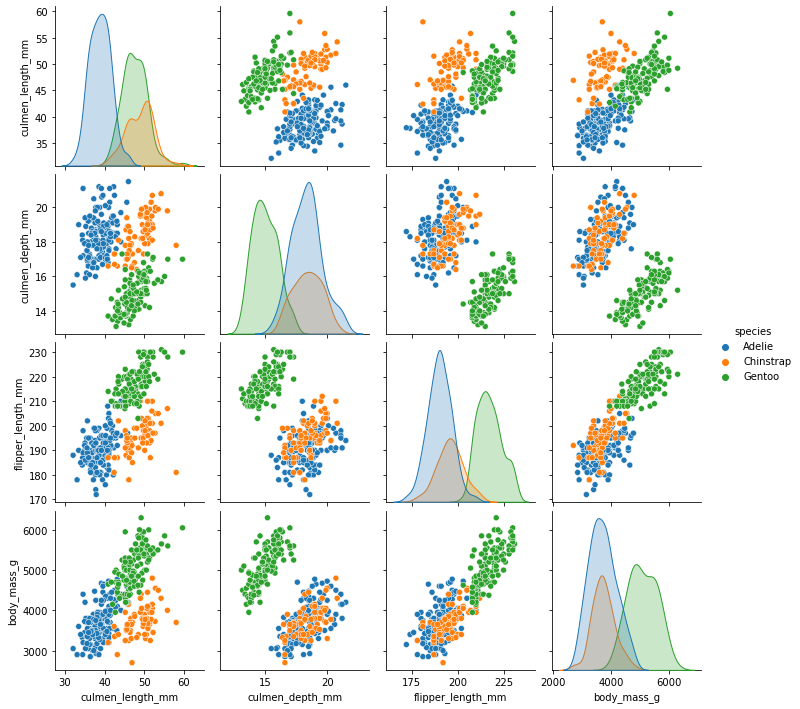

In [11]:
sns.pairplot(data, hue='species');

In [12]:
data.groupby('species')['body_mass_g'].mean()

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64

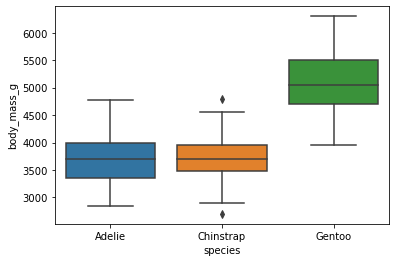

In [13]:
sns.boxplot(data=data,x="species",y=data['body_mass_g']);

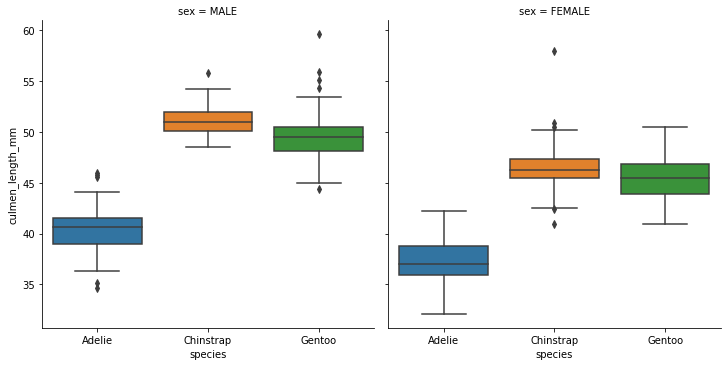

In [14]:
sns.catplot(x='species',y='culmen_length_mm',data=data,kind='box',col='sex');

In [16]:
from sklearn.preprocessing import MinMaxScaler
cat_columns = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
scaler = MinMaxScaler()
data[cat_columns] = scaler.fit_transform(data[cat_columns])
data.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen          0.254545         0.666667           0.152542   
1  Adelie  Torgersen          0.269091         0.511905           0.237288   
2  Adelie  Torgersen          0.298182         0.583333           0.389831   
4  Adelie  Torgersen          0.167273         0.738095           0.355932   
5  Adelie  Torgersen          0.261818         0.892857           0.305085   

   body_mass_g     sex  
0     0.291667    MALE  
1     0.305556  FEMALE  
2     0.152778  FEMALE  
4     0.208333  FEMALE  
5     0.263889    MALE

In [17]:
from sklearn.model_selection import train_test_split
X=pd.get_dummies(data.drop('species',axis=1))
y=data.species
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf = rf.fit(X_train,y_train)
rf_predictions = rf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,rf_predictions))
print(confusion_matrix(rf_predictions, y_test))
accuracy_score(rf_predictions, y_test)

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

[[40  1  0]
 [ 0 26  0]
 [ 0  0 33]]


0.99

### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>